# Coupling, impedance and capacitance

### Introduction
This notebook condnse my understanding of coupling an atom (anharmonic oscillator) to an open or s resonator system. Also taking some consideration on how the impedance and capacitance contribuite to the coupling.

How systems have an excitation frequency at few GHz, say 5GHz. If we consider the atom as a lumped element LC resonator than the we have a constrain on the capacitance $C$ and inductance $L$: 
$$f=\frac{1}{2\pi\sqrt{LC}}$$
Another constrain derive from the anharmonicity $\alpha$ directly related to C. In first approximation we wanto to maintain $\alpha\approx 200$MHz. In a transmon qubit this fix the capacitance:
$$C=\frac{1}{2}\frac{e^2}{h \alpha}\approx 100fF$$
This will automatically fix the inductance of a qubit as:
$$L=\frac{1}{(2\pi f)^2C}\approx 10nH$$
Finally this will fix the impedance of a qubit to:
$$Z_Q=\sqrt{\frac{L}{C}}\approx 300\Omega$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt #plot library
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
alpha=200e6
e=1.6e-19
h=6.62e-34
C=e**2/(2*h*alpha)
f=5e9
L=1/((2*np.pi*f)**2*C)
Z=np.sqrt(L/C)
print('Approximate capacitance for a Qubit:', C/1e-15, 'fF')
print('Approximate inductance for a Qubit:', C/1e-9, 'nH')
print('Approximate impedance for a Qubit:', Z, 'Ohm')


Approximate capacitance for a Qubit: 96.67673716012084 fF
Approximate inductance for a Qubit: 9.667673716012083e-05 nH
Approximate impedance for a Qubit: 329.25178852135855 Ohm


### Coupling calculation
A (relative) small fraction of the capacitance in a qubit is due to the coupling capacitance with the envirorment. In particular here we calculate the coupling with a resonator and with an open waveguide.

A qubit with resoance $\omega_q$, capacitance $C_q$ and impedance $Z_q$ coupled with a capacitance $C_g$ to a wave guide with impedance $Z_w$, has an effective coupling (in angular frequency):
$$ g = \omega_q \left( \frac{C_g}{C_q+C_g} \right)^2\frac{Z_w}{Z_q} $$
If the qubit is coupled to a resonator with angular resonance $\omega_r$, total capacitance $C_r$ and impedance $Z_r$, the effective coupling is:
$$g=\sqrt{\omega_q\omega_r}\frac{C_g}{2\sqrt{C_q C_r}}=\frac{1}{2}\omega_q\omega_rC_g\sqrt{Z_q Z_r}$$
Notice that the coupling is **linear** in $C_g$ for the coupling with a resonator mode, while is **quadratic** for the waveguide coupling.

In [2]:
def couplingWaveguide(omega_q, C_coupling, C_q, Z_0, Z_q):
    return (omega_q*(C_coupling/(C_q+C_coupling))**2*Z_0/Z_q)
                    
def couplingResonator(omega_q, omega_r, C_coupling, Z_q, Z_r):
    return (0.5*omega_q*omega_r*C_coupling*np.sqrt(Z_q*Z_r))

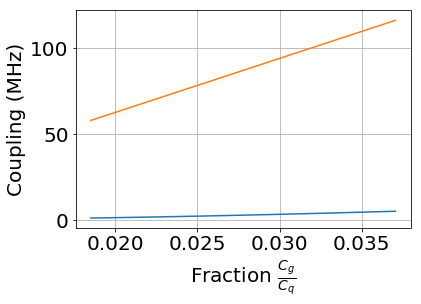

In [3]:
omega_q=2*np.pi*4e9
omega_r=2*np.pi*6e9
C_g=np.linspace(1e-15, 2e-15, 100)
C_q=54e-15
Z_w=50
Z_q=300
Z_r=50

plt.plot(C_g/C_q,couplingWaveguide(omega_q, C_g, C_q, Z_w, Z_q)/1e6)
plt.plot(C_g/C_q,couplingResonator(omega_q, omega_r, C_g, Z_q, Z_r)/1e6)
plt.xlabel(r'Fraction $\frac{C_g}{C_q}$', fontsize=20)
plt.ylabel('Coupling (MHz)', fontsize=20)
plt.grid(True)